In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_csv('pr1.csv')

In [93]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1=df.drop(['availability','society','area_type','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df1.shape

(13320, 5)

In [6]:
df1.isnull().count()

location      13320
size          13320
total_sqft    13320
bath          13320
price         13320
dtype: int64

In [7]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df1['size']=df1['size'].apply(lambda x:str(x).split(' ')[0])
df1=df1.dropna(subset=['size'])
df1['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [9]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def flo(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df[~df['total_sqft'].apply(flo)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [12]:
def con(x):
    t=str(x).split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))//2
    try:
        return float(x)
    except:
        return None

In [46]:
df1['total_sqft']=df1['total_sqft'].apply(con)

In [47]:
df1['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [48]:
con('11')
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [50]:
pp=df1['location'].value_counts()
pp
df1['location'].nunique()

1305

In [51]:
less=pp[pp<20]
less

Kalyan nagar                      19
HRBR Layout                       19
OMBR Layout                       19
Pai Layout                        19
Kaggalipura                       19
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1157, dtype: int64

In [53]:
df1['location']=df['location'].apply(lambda x: 'other' if x in less else x)
df1['location'].nunique()

149

In [58]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']
df1

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,other,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [72]:
df1=df1[df1['size']!='nan']
df1['size']=df1['size'].astype('int')
df1=df1[~(df1['total_sqft']/df1['size']<300)]
df1.shape

(12560, 6)

In [73]:
df1['price_per_sqft'].describe()

count     12514.000000
mean       6307.379797
std        4160.769994
min         267.829813
25%        4210.762120
50%        5295.073227
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [84]:
def out_lier(df):
    dfout=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        redf=subdf[(subdf['price_per_sqft']>(m-st))&(subdf['price_per_sqft']<=(m+st))]
        dfout=pd.concat([dfout,redf],ignore_index=True)
    return dfout

In [85]:
df2=out_lier(df1)
df2.shape

(10466, 6)

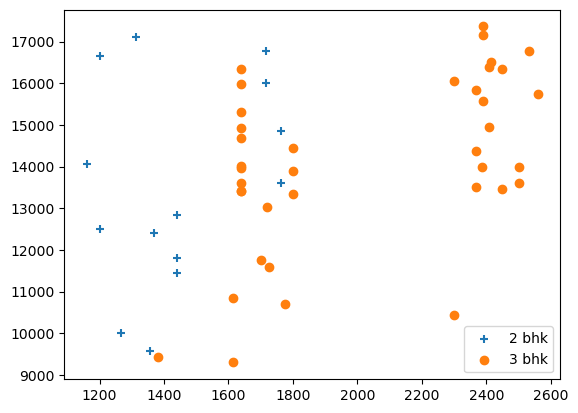

In [97]:
def pl_scatter(df,loc):
    bhk2=df[(df['location']==loc)&(df['size']==2)]
    bhk3=df[(df['location']==loc)&(df['size']==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,marker='+',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,label='3 bhk')
    plt.legend()
    plt.show()
pl_scatter(df2,'Rajaji Nagar')

In [107]:
def out_lier(df):
    dfout=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        print(subdf)
out_lier(df1)

                 location  size  total_sqft  bath  price  price_per_sqft
936    1st Phase JP Nagar     4      2825.0   4.0  250.0     8849.557522
2106   1st Phase JP Nagar     3      1875.0   3.0  167.0     8906.666667
2292   1st Phase JP Nagar     5      1500.0   5.0   85.0     5666.666667
2914   1st Phase JP Nagar     3      2065.0   4.0  210.0    10169.491525
3481   1st Phase JP Nagar     3      2024.0   3.0  157.0     7756.916996
3669   1st Phase JP Nagar     3      2059.0   3.0  225.0    10927.634774
4605   1st Phase JP Nagar     2      1394.0   2.0  100.0     7173.601148
5497   1st Phase JP Nagar     2      1077.0   2.0   93.0     8635.097493
5976   1st Phase JP Nagar     1         NaN   1.0   63.0             NaN
6025   1st Phase JP Nagar     2      1566.0   2.0  180.0    11494.252874
6366   1st Phase JP Nagar     1       840.0   2.0   50.0     5952.380952
6465   1st Phase JP Nagar     3      1590.0   3.0  131.0     8238.993711
7416   1st Phase JP Nagar     3      2180.0   3.0  

           location  size  total_sqft  bath   price  price_per_sqft
402    Battarahalli     2      1200.0   2.0   65.00     5416.666667
773    Battarahalli     3      1779.0   3.0   89.61     5037.099494
874    Battarahalli     2      1300.0   2.0   50.00     3846.153846
1198   Battarahalli     3      1945.0   3.0   97.42     5008.740360
3184   Battarahalli     3      1777.0   3.0  100.00     5627.462015
3905   Battarahalli     2      1135.0   2.0   43.00     3788.546256
4391   Battarahalli     2      1276.0   2.0   45.00     3526.645768
4558   Battarahalli     3      1880.0   3.0   94.36     5019.148936
5107   Battarahalli     2      1071.0   2.0   62.00     5788.982260
6177   Battarahalli     2      1165.0   2.0   43.00     3690.987124
7394   Battarahalli     1       600.0   1.0   47.00     7833.333333
7705   Battarahalli     2      1636.0   2.0   82.89     5066.625917
7854   Battarahalli     3      1779.0   3.0   90.00     5059.021922
8447   Battarahalli     3      1516.0   3.0   65

      location  size  total_sqft  bath  price  price_per_sqft
95      Domlur     3      1540.0   3.0   90.0     5844.155844
1750    Domlur     3      1875.0   2.0  150.0     8000.000000
1816    Domlur     3      1429.0   3.0   86.0     6018.194542
1859    Domlur     2      1206.0   2.0  217.0    17993.366501
1907    Domlur     1       640.0   1.0   55.0     8593.750000
2327    Domlur     2      1050.0   2.0   85.0     8095.238095
2938    Domlur     3      1800.0   3.0  150.0     8333.333333
3857    Domlur     6      2400.0   4.0  600.0    25000.000000
3877    Domlur     3      1720.0   3.0  135.0     7848.837209
4985    Domlur     3      1950.0   3.0  165.0     8461.538462
5714    Domlur     3      2180.0   3.0  285.0    13073.394495
7347    Domlur     1       650.0   1.0   70.0    10769.230769
7547    Domlur     1       780.0   1.0   70.0     8974.358974
7995    Domlur     3      2180.0   3.0  285.0    13073.394495
8812    Domlur     3      1740.0   3.0  120.0     6896.551724
8935    

       location  size  total_sqft  bath   price  price_per_sqft
154    Hulimavu     2      1125.0   2.0   50.00     4444.444444
180    Hulimavu     2      1242.0   2.0   51.00     4106.280193
449    Hulimavu     3      1650.0   3.0   78.00     4727.272727
721    Hulimavu     3      1823.0   3.0  100.00     5485.463522
758    Hulimavu     2      1300.0   2.0   36.00     2769.230769
1645   Hulimavu     2      1080.0   2.0   43.20     4000.000000
1845   Hulimavu     2      1100.0   2.0   71.50     6500.000000
1848   Hulimavu     3      1758.0   3.0   65.00     3697.383390
1964   Hulimavu     1       688.0   1.0   50.00     7267.441860
2101   Hulimavu     2      1255.0   2.0   73.00     5816.733068
2198   Hulimavu     4      1200.0   4.0   75.00     6250.000000
2490   Hulimavu     2      1058.0   2.0   48.00     4536.862004
2773   Hulimavu     2      1375.0   2.0   80.00     5818.181818
3041   Hulimavu     2      1248.0   2.0   69.00     5528.846154
3098   Hulimavu     3      1818.0   3.0 

                location  size  total_sqft  bath  price  price_per_sqft
680    Kodichikkanahalli     3      1190.0   2.0   57.0     4789.915966
864    Kodichikkanahalli     2       995.0   2.0   41.0     4120.603015
1446   Kodichikkanahalli     1       650.0   1.0   38.0     5846.153846
2519   Kodichikkanahalli     5      2700.0   7.0  125.0     4629.629630
3307   Kodichikkanahalli     3      1495.0   2.0   75.0     5016.722408
3490   Kodichikkanahalli     4      3250.0   4.0  180.0     5538.461538
3507   Kodichikkanahalli     2      1125.0   2.0   52.0     4622.222222
4354   Kodichikkanahalli     2      1150.0   2.0   48.0     4173.913043
4406   Kodichikkanahalli     2      1070.0   2.0   43.0     4018.691589
4674   Kodichikkanahalli     3      1620.0   2.0   85.0     5246.913580
5264   Kodichikkanahalli     3      1560.0   2.0   65.0     4166.666667
5656   Kodichikkanahalli     2      1025.0   2.0   66.0     6439.024390
6652   Kodichikkanahalli     2      1026.0   2.0   45.0     4385

         location  size  total_sqft  bath  price  price_per_sqft
617    R.T. Nagar     4      1500.0   4.0   70.0     4666.666667
1714   R.T. Nagar     2      1200.0   2.0  120.0    10000.000000
2052   R.T. Nagar     3      1560.0   3.0   85.0     5448.717949
2342   R.T. Nagar     2      1040.0   2.0   46.0     4423.076923
3502   R.T. Nagar     2      1200.0   2.0   45.0     3750.000000
4045   R.T. Nagar     4      2000.0   4.0  320.0    16000.000000
4746   R.T. Nagar     2      1235.0   2.0   65.0     5263.157895
4855   R.T. Nagar     2       800.0   1.0  170.0    21250.000000
4941   R.T. Nagar     5      2400.0   6.0  450.0    18750.000000
5152   R.T. Nagar     3      1140.0   3.0  130.0    11403.508772
5675   R.T. Nagar     2       970.0   2.0   55.0     5670.103093
6072   R.T. Nagar     3      1560.0   3.0  125.0     8012.820513
6849   R.T. Nagar     2      1200.0   2.0   60.0     5000.000000
7267   R.T. Nagar     3      1380.0   2.0   50.0     3623.188406
7313   R.T. Nagar     3  

In [137]:
def out(df):
    ex_ind=np.array([])
    for key,loc_df in df.groupby('location'):
        samp={}
        for bhk,bhk_df in loc_df.groupby('size'):
            samp[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'cou':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('size'):
            stat=samp.get(bhk-1)
            if stat and stat['cou']>5:
                ex_ind=np.append(ex_ind,bhk_df[bhk_df.price_per_sqft<(stat['mean'])].index.values)
    return df.drop(ex_ind,axis='index')

In [138]:
df3=out(df2)
df3.shape

(7034, 6)

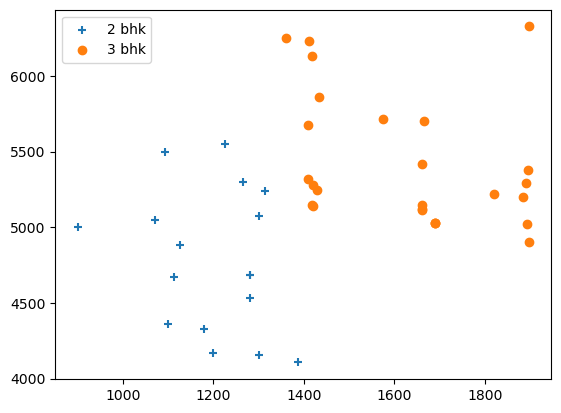

In [140]:
def pl_scatter(df,loc):
    bhk2=df[(df['location']==loc)&(df['size']==2)]
    bhk3=df[(df['location']==loc)&(df['size']==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,marker='+',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,label='3 bhk')
    plt.legend()
    plt.show()
pl_scatter(df3,'Akshaya Nagar')

In [157]:
df3[df3['bath']>df3['size']+2]

,location,size,total_sqft,bath,price,price_per_sqft
5897,Thanisandra,3,1806.0,6.0,116.0,6423.034330
7788,other,6,11338.0,9.0,1000.0,8819.897689
9961,other,4,7000.0,8.0,450.0,6428.571429


In [158]:
df4=df3[~(df3['bath']>df3['size']+2)]
df4.shape

(7031, 6)

In [159]:
df5=df4.drop('price_per_sqft',axis='columns')

In [160]:
df5.head()

,location,size,total_sqft,bath,price
1,1st Phase JP Nagar,3,1875.0,3.0,167.0
2,1st Phase JP Nagar,5,1500.0,5.0,85.0
3,1st Phase JP Nagar,3,2065.0,4.0,210.0
5,1st Phase JP Nagar,3,2059.0,3.0,225.0
6,1st Phase JP Nagar,2,1394.0,2.0,100.0


In [174]:
df5.isna().sum()
df5.dropna(inplace=True)
df5.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [176]:
dum=pd.get_dummies(df5.location)
dum

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [177]:
df6=pd.concat([df5,dum],axis=1)
df6

,location,size,total_sqft,bath,price,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1st Phase JP Nagar,3,1875.0,3.0,167.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,5,1500.0,5.0,85.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,3,2065.0,4.0,210.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,3,2059.0,3.0,225.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,2,1394.0,2.0,100.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,other,1,812.0,1.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10461,other,2,1200.0,2.0,140.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10462,other,2,1015.0,2.0,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10464,other,3,1805.0,3.0,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [178]:
df7=df6.drop(['location','other'],axis='columns')
df7.head()

,size,total_sqft,bath,price,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,3,1875.0,3.0,167.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1500.0,5.0,85.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2065.0,4.0,210.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2059.0,3.0,225.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1394.0,2.0,100.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
x=df7.drop('price',axis='columns')
y=df7.price

151

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8891570163773431

In [202]:
def pre(loc,sqft,bath,size):
    loc_ind=np.where(x.columns==loc)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=size
    X[1]=sqft
    X[2]=bath
    if loc_ind>=0:
        X[loc_ind]=1
    return lr.predict([X])[0]
pre('1st Phase JP Nagar',1875,3,3)

C:\Users\Mahendra Reddy\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.6427385964332

In [203]:
import pickle
with open("predict_land_price.csv",'wb') as f:
    pickle.dump(lr,f)

In [204]:
import json
columns={
    'data-col':[col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))